In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Let's import a classification dataset
from sklearn.datasets import make_circles

# Set samples to 1000
n_samples = 1000

# Features and Labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [12]:
len(X)

1000

In [13]:
# Let's divide our dataset into training and testing sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [14]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=['accuracy'])

# 3. Fit the model
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 749us/step - loss: 0.6795 - accuracy: 0.5650
Epoch 3/20
25/25 [==============================] - 0s 713us/step - loss: 0.6631 - accuracy: 0.5913
Epoch 4/20
25/25 [==============================] - 0s 764us/step - loss: 0.6318 - accuracy: 0.6600
Epoch 5/20
25/25 [==============================] - 0s 851us/step - loss: 0.5897 - accuracy: 0.6988
Epoch 6/20
25/25 [==============================] - 0s 853us/step - loss: 0.5294 - accuracy: 0.7862
Epoch 7/20
25/25 [==============================] - 0s 709us/step - loss: 0.4897 - accuracy: 0.7875
Epoch 8/20
25/25 [==============================] - 0s 672us/step - loss: 0.4499 - accuracy: 0.8263
Epoch 9/20
25/25 [==============================] - 0s 687us/step - loss: 0.4093 - accuracy: 0.8400
Epoch 10/20
25/25 [==============================] - 0s 661us/step - loss: 0.3585 - accuracy: 0.8712
E

In [15]:
# Let's evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"The loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9900
The loss on test set: 0.05653473734855652
Model accuracy on test set: 99.00%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

   # The above code will result in a error

In [ ]:
y_preds = model.predict(X_test)
y_preds[:10]

7/7 [==============================] - 0s 1ms/step


array([[0.97459275],
       [0.97459275],
       [0.97459275],
       [0.97459275],
       [0.04907397],
       [0.00285016],
       [0.93040955],
       [0.00097606],
       [0.97459275],
       [0.02157443]], dtype=float32)

In [17]:
# View the first 10 labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [18]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Wonderful! now we can use confusion_matrix function

In [19]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

Alright, we can see the highest numbers are down the diagonal(from top left to bottom right) so this is a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

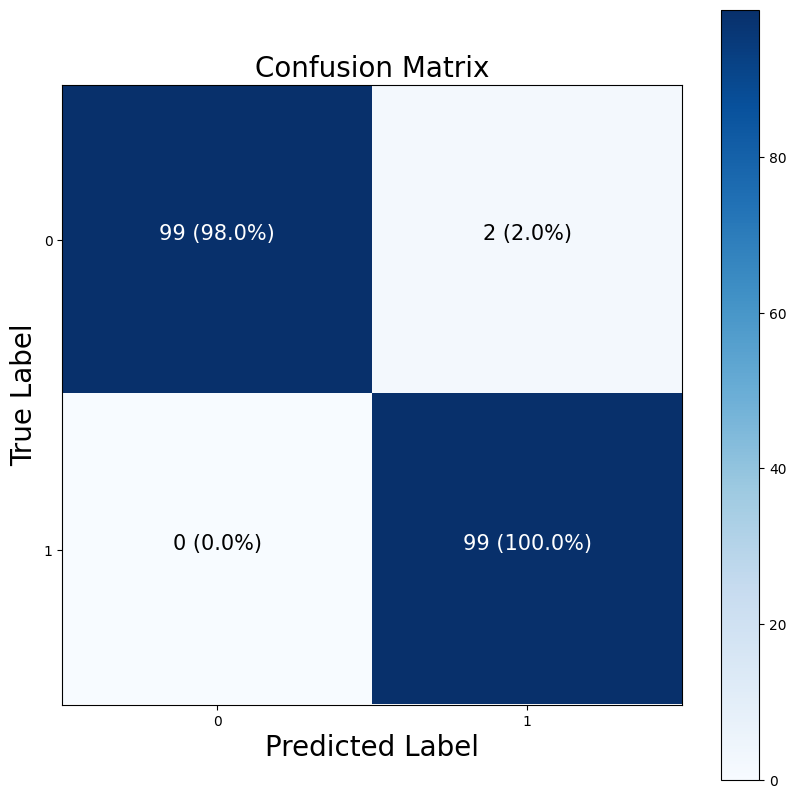

In [20]:
import itertools

figsize = (10,10)

# Create a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it 
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=15)

That looks much better. It seems our model has made almost perfect predictionson the test set except for two faslse positives (top right corner).

In [21]:
# What does itertools.product do? Combine two things into each combination
import itertools
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i,j)

0 0
0 1
1 0
1 1
